In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
orders = [3,1,5,2,4]
flist = glob.glob("quantification/*.csv")
df = pd.DataFrame()
for file, order, in zip(flist, orders):
    file_tmp = pd.read_csv(file,index_col=0).T
    file_tmp["sample"] = file[15:-4]
    file_tmp["order"] = order
    df = pd.concat([df,file_tmp])
df = df.reset_index(drop = True)
df2 = df.sort_values('order')
df2
df3 = df2.rename(columns={1: 'iRFP',2: 'mNG'})
df3["iRFP/mNG"] = df3["iRFP"]/df3["mNG"]
df3

iRFP       mNG        sample  order  iRFP/mNG
98     30.096  8999.840  SK409-DMSO-2      1  0.003344
70     31.609  8914.455  SK409-DMSO-2      1  0.003546
69     29.218  8052.519  SK409-DMSO-2      1  0.003628
68     24.526  9211.628  SK409-DMSO-2      1  0.002663
67     30.801  9132.923  SK409-DMSO-2      1  0.003373
..        ...       ...           ...    ...       ...
128  2261.083  5699.186       SK410-1      5  0.396738
127  3190.231  6824.109       SK410-1      5  0.467494
126  2848.353  6246.647       SK410-1      5  0.455981
136  3504.955  8381.609       SK410-1      5  0.418172
124  2994.622  6803.224       SK410-1      5  0.440177

[250 rows x 5 columns]

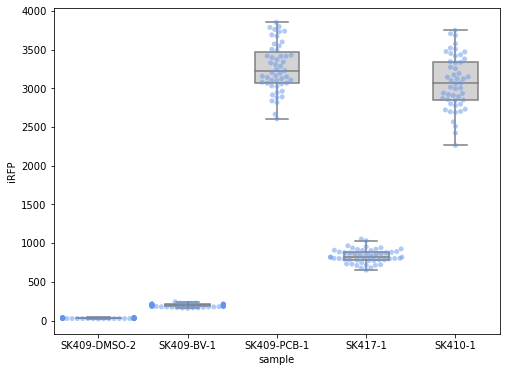

In [3]:
plt.figure(figsize=(8,6))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df3, x='sample', y='iRFP', color ='lightgrey',fliersize=0 , width=0.5)
sns.swarmplot(x="sample", y="iRFP", data=df3, color="cornflowerblue", size=5, alpha =0.5)
#plt.savefig("20210730-iRFP-1.pdf")

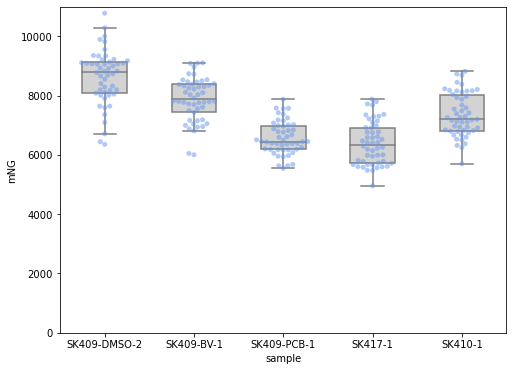

In [4]:
plt.figure(figsize=(8,6))
plt.ylim(0,11000)
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df3, x='sample', y='mNG', color ='lightgrey',fliersize=0 , width=0.5)
sns.swarmplot(x="sample", y="mNG", data=df3, color="cornflowerblue", size=5, alpha =0.5)
#plt.savefig("20210730-mNG-2.pdf")

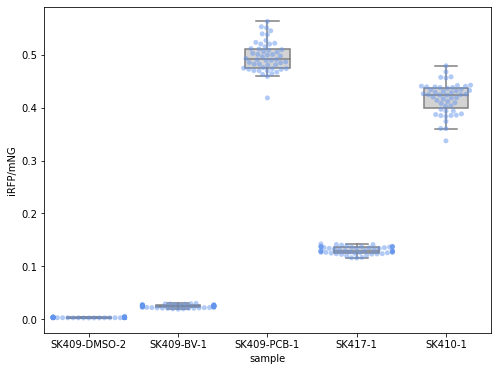

In [5]:
plt.figure(figsize=(8,6))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df3, x='sample', y='iRFP/mNG', color ='lightgrey',fliersize=0 , width=0.5)
sns.swarmplot(x="sample", y="iRFP/mNG", data=df3, color="cornflowerblue", size=5, alpha =0.5)
#plt.savefig("20210730-iRFP-mNG-2.pdf")